In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib as mpl
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_feather('../data/EW82_9.feather')
df.head()

In [ ]:
df_490 = df[df['flow_rate'] == 490]

df_500 = df_490.copy()
df_500['flow_rate'] = 500

df = df[df['flow_rate'] != 500]

df = pd.concat([df, df_500], ignore_index=True)

df.head()

index               name  \
0  sample 0  setup/liquid/EW82   
1  sample 1  setup/liquid/EW82   
2  sample 2  setup/liquid/EW82   
3  sample 3  setup/liquid/EW82   
4  sample 4  setup/liquid/EW82   

                                             current  flow_rate  voltage  \
0  [2.521749973297119, 6.556550025939941, -0.2521...          1  3000.27   
1  [-1.5130500793457031, 1.5130500793457031, 1.26...          1  3000.27   
2  [-5.547850608825684, -3.27827501296997, -6.304...          1  3000.27   
3  [1.7652250528335571, 6.556550025939941, 5.0434...          1  3000.27   
4  [5.547850608825684, 0.756525039672851, -1.5130...          1  3200.30   

     current_PS  temperature  humidity              date_and_time  \
0  3.820290e-07         0.00      0.00 2024-07-16 15:21:51.488490   
1  3.820290e-07         0.00     76.56 2024-07-16 15:21:52.172585   
2  3.820290e-07        22.09     76.56 2024-07-16 15:21:52.901442   
3  3.820290e-07        22.09     77.56 2024-07-16 15:21:53.583655   
4  4.362550e-07        22.09     77.56 2024-07-16 15:21:54.275735   

   target_voltage      mean   variance  deviation    median       rms  \
0            3000  0.911643  13.247723   3.639742  1.008700  3.752175   
1            3000  0.802194  13.342090   3.652683  0.756525  3.739733   
2            3000  0.852962  13.399737   3.660565  0.756525  3.758628   
3            3000  1.102777  13.314670   3.648927  1.008700  3.811927   
4            3200  0.853441  13.210358   3.634606  0.756525  3.733459   

  spray_mode generalist_ml_spray_mode ml_spray_mode nn_spray_mode  
0  Undefined                Undefined     Undefined     Multi Jet  
1  Undefined                Undefined     Undefined     Undefined  
2   Dripping                 Dripping      Dripping     Undefined  
3  Undefined                Undefined     Undefined     Undefined  
4   Dripping                 Dripping      Dripping     Undefined

In [34]:
#Experiment Properties and Variables

permitivity_of_vacum = 8.85E-12
density = 854 #kg/m3
surface_tension = 0.024 #N/m
ehda_reynolds =	0.000003233936202
viscosity = 0.00233 #Pa.s
conductivity = 0.0000285 #S/m
dielectric_constant = 41.28
nozzle_outer_radius =  0.00068 #m
ulmin_to_m3s = 1.67E-11 #convert flow units

In [35]:
# Undimentional X axis

#Calvo's Method + Convertion of Units
Qzero = ((surface_tension*permitivity_of_vacum)/(density*conductivity))*10000000000
df['Undimensional_flowrate'] = df['flow_rate']*ulmin_to_m3s/Qzero

print(Qzero)
print(df.Undimensional_flowrate[1])

0.0872673486996179
1.913659604519774e-10


In [36]:
# Undimentional Y axis
Vzero = (2*surface_tension*nozzle_outer_radius)
df['Undimensional_voltage'] = (df['voltage'].pow(2) * permitivity_of_vacum) / Vzero

print(Vzero)

3.2640000000000006e-05


In [37]:
# Filtering the delay
df = df.loc[(df['voltage'] < 8800)]

In [38]:
#Mapping manually the wrong spray_mode classification

def update_spray_mode(df, target_flow_rate, voltage_range, target_spray_mode, new_spray_mode):
    # Use .loc to update "spray_mode" based on "flow_rate," "voltage," and "spray_mode" conditions
    df.loc[(df['flow_rate'] == target_flow_rate) & 
           df['voltage'].between(voltage_range[0], voltage_range[1]) & 
           (df['spray_mode'] == target_spray_mode), 'spray_mode'] = new_spray_mode

# Define a list of conditions, each containing a target "flow_rate," "voltage" range, and a "spray_mode"
conditions = [
              (11.00, (5800, 6200), 'Cone Jet', 'Undefined'),
              (12.00, (5800, 6200), 'Cone Jet', 'Undefined'),
              (13.00, (5800, 6200), 'Cone Jet', 'Undefined'),
              (14.00, (5800, 6200), 'Cone Jet', 'Undefined'),
              (15.00, (5800, 6200), 'Cone Jet', 'Undefined'),
              (16.00, (5800, 6200), 'Cone Jet', 'Undefined'),    
              (17.00, (5800, 6200), 'Cone Jet', 'Undefined'),
              (18.00, (6000, 6200), 'Cone Jet', 'Undefined'),                                                        
              (19.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (20.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (21.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (22.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (23.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (24.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (25.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (26.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (27.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (28.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (29.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (30.00, (5800, 6200), 'Cone Jet', 'Undefined'),                                                        
              (32.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (34.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (36.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (38.00, (6000, 6200), 'Cone Jet', 'Undefined'),                                                        
              (40.00, (6000, 6200), 'Cone Jet', 'Undefined'),                                                        
              (42.00, (6000, 6400), 'Cone Jet', 'Undefined'),  
              (44.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (46.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (48.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (50.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (52.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (54.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (56.00, (6000, 6400), 'Cone Jet', 'Undefined'),                                                        
              (58.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (60.00, (5800, 6400), 'Cone Jet', 'Undefined'),  
              (62.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (64.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (66.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (68.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (70.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (72.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (74.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (76.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (78.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (80.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (82.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (84.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (86.00, (5800, 6400), 'Cone Jet', 'Undefined'), 
              (88.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (90.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (92.00, (5800, 6400), 'Cone Jet', 'Undefined'),                                                        
              (94.00, (5800, 6600), 'Cone Jet', 'Undefined'),                                                        
              (96.00, (5800, 6600), 'Cone Jet', 'Undefined'),                                                        
              (98.00, (5800, 6600), 'Cone Jet', 'Undefined'),                                                        
              (100.00, (5800, 6600), 'Cone Jet', 'Undefined'),                                                        
              (110.00, (5800, 6600), 'Cone Jet', 'Undefined'),                                                        
              (105.00, (5800, 6600), 'Cone Jet', 'Undefined'),                                                        
              (115.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (120.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (125.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (130.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (135.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (140.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (145.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (150.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (155.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (160.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (165.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (170.00, (5800, 6800), 'Cone Jet', 'Undefined'),                                                        
              (175.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (180.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (185.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (190.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (195.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (200.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (205.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (210.00, (5600, 6800), 'Cone Jet', 'Undefined'),
              (215.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                                                                              
              (220.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                                                                              
              (225.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                                                                              
              (230.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                                                                              
              (235.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                                                                                                                                                                                       
              (240.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (245.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (250.00, (5600, 6800), 'Cone Jet', 'Undefined'),                                                        
              (260.00, (5400, 6800), 'Cone Jet', 'Undefined'),                                                        
              (270.00, (5400, 7000), 'Cone Jet', 'Undefined'),                                                        
              (280.00, (5400, 7000), 'Cone Jet', 'Undefined'),                                                                                                   
              (290.00, (5400, 7000), 'Cone Jet', 'Undefined'),                                                                                                   
              (300.00, (5400, 7000), 'Cone Jet', 'Undefined'),                                                                                                  
              (310.00, (5400, 7000), 'Cone Jet', 'Undefined'),                                                                                                    
              (320.00, (5400, 7000), 'Cone Jet', 'Undefined'),                                                        
              (330.00, (5400, 7200), 'Cone Jet', 'Undefined'),
              (340.00, (5400, 7200), 'Cone Jet', 'Undefined'),
              (350.00, (5400, 7200), 'Cone Jet', 'Undefined'),
              (360.00, (5400, 7200), 'Cone Jet', 'Undefined'),                                                        
              (370.00, (5400, 7200), 'Cone Jet', 'Undefined'),
              (380.00, (5400, 7200), 'Cone Jet', 'Undefined'),
              (390.00, (5400, 7400), 'Cone Jet', 'Undefined'),
              (400.00, (5400, 7400), 'Cone Jet', 'Undefined'),
              (410.00, (5400, 7400), 'Cone Jet', 'Undefined'),
              (420.00, (5400, 7400), 'Cone Jet', 'Undefined'),                                                        
              (430.00, (5400, 7400), 'Cone Jet', 'Undefined'),  
              (440.00, (5400, 7400), 'Cone Jet', 'Undefined'),                                                        
              (450.00, (5400, 7400), 'Cone Jet', 'Undefined'),                                                        
              (460.00, (5400, 7600), 'Cone Jet', 'Undefined'),                                                        
              (470.00, (5400, 7600), 'Cone Jet', 'Undefined'),                                                        
              (480.00, (5400, 7600), 'Cone Jet', 'Undefined'),                                                        
              (490.00, (5400, 7600), 'Cone Jet', 'Undefined'),                                                        
              (500.00, (5400, 7600), 'Cone Jet', 'Undefined'),                                                        
              (525.00, (5400, 7800), 'Cone Jet', 'Undefined'),
              (550.00, (5400, 7800), 'Cone Jet', 'Undefined'),                                                        
              (575.00, (5400, 8000), 'Cone Jet', 'Undefined'),                                                        
              (600.00, (5400, 8000), 'Cone Jet', 'Undefined'),                                                         
              (625.00, (5400, 8200), 'Cone Jet', 'Undefined'),                                                       
              (650.00, (5400, 8400), 'Cone Jet', 'Undefined'),                                                        
              (675.00, (5400, 8400), 'Cone Jet', 'Undefined'),                                                        
              (700.00, (5400, 8400), 'Cone Jet', 'Undefined'),                                                        
              (725.00, (5400, 8400), 'Cone Jet', 'Undefined'),                                                        
              (750.00, (5400, 8600), 'Cone Jet', 'Undefined'),                                                        
              (775.00, (5400, 8600), 'Cone Jet', 'Undefined'),                                                        
              (800.00, (5400, 8800), 'Cone Jet', 'Undefined'),                                                        
              (825.00, (5400, 8800), 'Cone Jet', 'Undefined'),                                                        
              (850.00, (5400, 8800), 'Cone Jet', 'Undefined'),                                                        
              (875.00, (5400, 8800), 'Cone Jet', 'Undefined'),                                                        
              (900.00, (5400, 8800), 'Cone Jet', 'Undefined'),                                                        
              (925.00, (5400, 8800), 'Cone Jet', 'Undefined'),                                                        
              (950.00, (5400, 8800), 'Cone Jet', 'Undefined'),                                                        
              (975.00, (5400, 8800), 'Cone Jet', 'Undefined'),                                                        
              (1000.00, (5400, 8800), 'Cone Jet', 'Undefined'),    
              (10.00, (5800, 20000), 'Cone Jet', 'Multi Jet'),
              (11.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),
              (12.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),
              (13.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),
              (14.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),
              (15.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),
              (16.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),    
              (17.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),
              (18.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (19.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (20.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (21.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (22.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (23.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (24.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (25.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (26.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (27.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (28.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (29.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (30.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (32.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (34.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (36.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (38.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (40.00, (6200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (42.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),  
              (44.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (46.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (48.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (50.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (52.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (54.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (56.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (58.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (60.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),  
              (62.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (64.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (66.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (68.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (70.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (72.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (74.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (76.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (78.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (80.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (82.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (84.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (86.00, (6400, 20000), 'Cone Jet', 'Multi Jet'), 
              (88.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (90.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (92.00, (6400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (94.00, (6600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (96.00, (6600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (98.00, (6600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (100.00, (6600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (110.00, (6600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (105.00, (6600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (115.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (120.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (125.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (130.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (135.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (140.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (145.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (150.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (155.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (160.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (165.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (170.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (175.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (180.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (185.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (190.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (195.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (200.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (205.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (210.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),
              (215.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                                                                              
              (220.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                                                                              
              (225.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                                                                              
              (230.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                                                                              
              (235.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                                                                                                                                                                                       
              (240.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (245.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (250.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (260.00, (6800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (270.00, (7000, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (280.00, (7000, 20000), 'Cone Jet', 'Multi Jet'),                                                                                                   
              (290.00, (7000, 20000), 'Cone Jet', 'Multi Jet'),                                                                                                   
              (300.00, (7000, 20000), 'Cone Jet', 'Multi Jet'),                                                                                                  
              (310.00, (7000, 20000), 'Cone Jet', 'Multi Jet'),                                                                                                    
              (320.00, (7000, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (330.00, (7200, 20000), 'Cone Jet', 'Multi Jet'),
              (340.00, (7200, 20000), 'Cone Jet', 'Multi Jet'),
              (350.00, (7200, 20000), 'Cone Jet', 'Multi Jet'),
              (360.00, (7200, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (370.00, (7200, 20000), 'Cone Jet', 'Multi Jet'),
              (380.00, (7200, 20000), 'Cone Jet', 'Multi Jet'),
              (390.00, (7400, 20000), 'Cone Jet', 'Multi Jet'),
              (400.00, (7400, 20000), 'Cone Jet', 'Multi Jet'),
              (410.00, (7400, 20000), 'Cone Jet', 'Multi Jet'),
              (420.00, (7400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (430.00, (7400, 20000), 'Cone Jet', 'Multi Jet'),  
              (440.00, (7400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (450.00, (7400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (460.00, (7600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (470.00, (7600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (480.00, (7600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (490.00, (7600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (500.00, (7600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (525.00, (7800, 20000), 'Cone Jet', 'Multi Jet'),
              (550.00, (7800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (575.00, (8000, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (600.00, (8000, 20000), 'Cone Jet', 'Multi Jet'),                                                         
              (625.00, (8200, 20000), 'Cone Jet', 'Multi Jet'),                                                       
              (650.00, (8400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (675.00, (8400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (700.00, (8400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (725.00, (8400, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (750.00, (8600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (775.00, (8600, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (800.00, (8800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (825.00, (8800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (850.00, (8800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (875.00, (8800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (900.00, (8800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (925.00, (8800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (950.00, (8800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (975.00, (8800, 20000), 'Cone Jet', 'Multi Jet'),                                                        
              (1000.00, (8800, 20000), 'Cone Jet', 'Multi Jet'),                                                        


]	


# Apply the update_spray_mode function to each condition
for condition in conditions:
    target_flow_rate, voltage_range, target_spray_mode, new_spray_mode = condition
    update_spray_mode(df, target_flow_rate, voltage_range, target_spray_mode, new_spray_mode)

In [39]:
# Use only to generate ML training data
# ml_df = df[['name', 'mean', 'variance', 'deviation', 'median', 'rms', 'spray_mode', 'voltage', 'flow_rate', 'Undimensional_flowrate', 'Undimensional_voltage', 'temperature', 'humidity']]
# ml_df = ml_df.reset_index()
# ml_df.to_feather("../machine_learning/data/EW82_8_relabeled.feather")

In [ ]:
colormap = []
for electro_class in df['spray_mode']:
    if electro_class == 'Intermittent':
        colormap.append('red')
    elif electro_class == 'Cone Jet':
       colormap.append('orange')
    elif electro_class == 'Dripping':
        colormap.append('blue')
    elif electro_class == 'Multi Jet':
        colormap.append('purple')
    elif electro_class == 'Undefined':
        colormap.append('green')
    elif electro_class == 'Corona':
        colormap.append('pink')    
    else:
        colormap.append('orange')


df.insert(1, 'colormap', colormap)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13054 entries, 0 to 15839
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     13054 non-null  object        
 1   colormap                  13054 non-null  object        
 2   name                      13054 non-null  object        
 3   current                   13054 non-null  object        
 4   flow_rate                 13054 non-null  int64         
 5   voltage                   13054 non-null  float64       
 6   current_PS                13054 non-null  float64       
 7   temperature               13054 non-null  float64       
 8   humidity                  13054 non-null  float64       
 9   date_and_time             13054 non-null  datetime64[ns]
 10  target_voltage            13054 non-null  int64         
 11  mean                      13054 non-null  float64       
 12  variance               

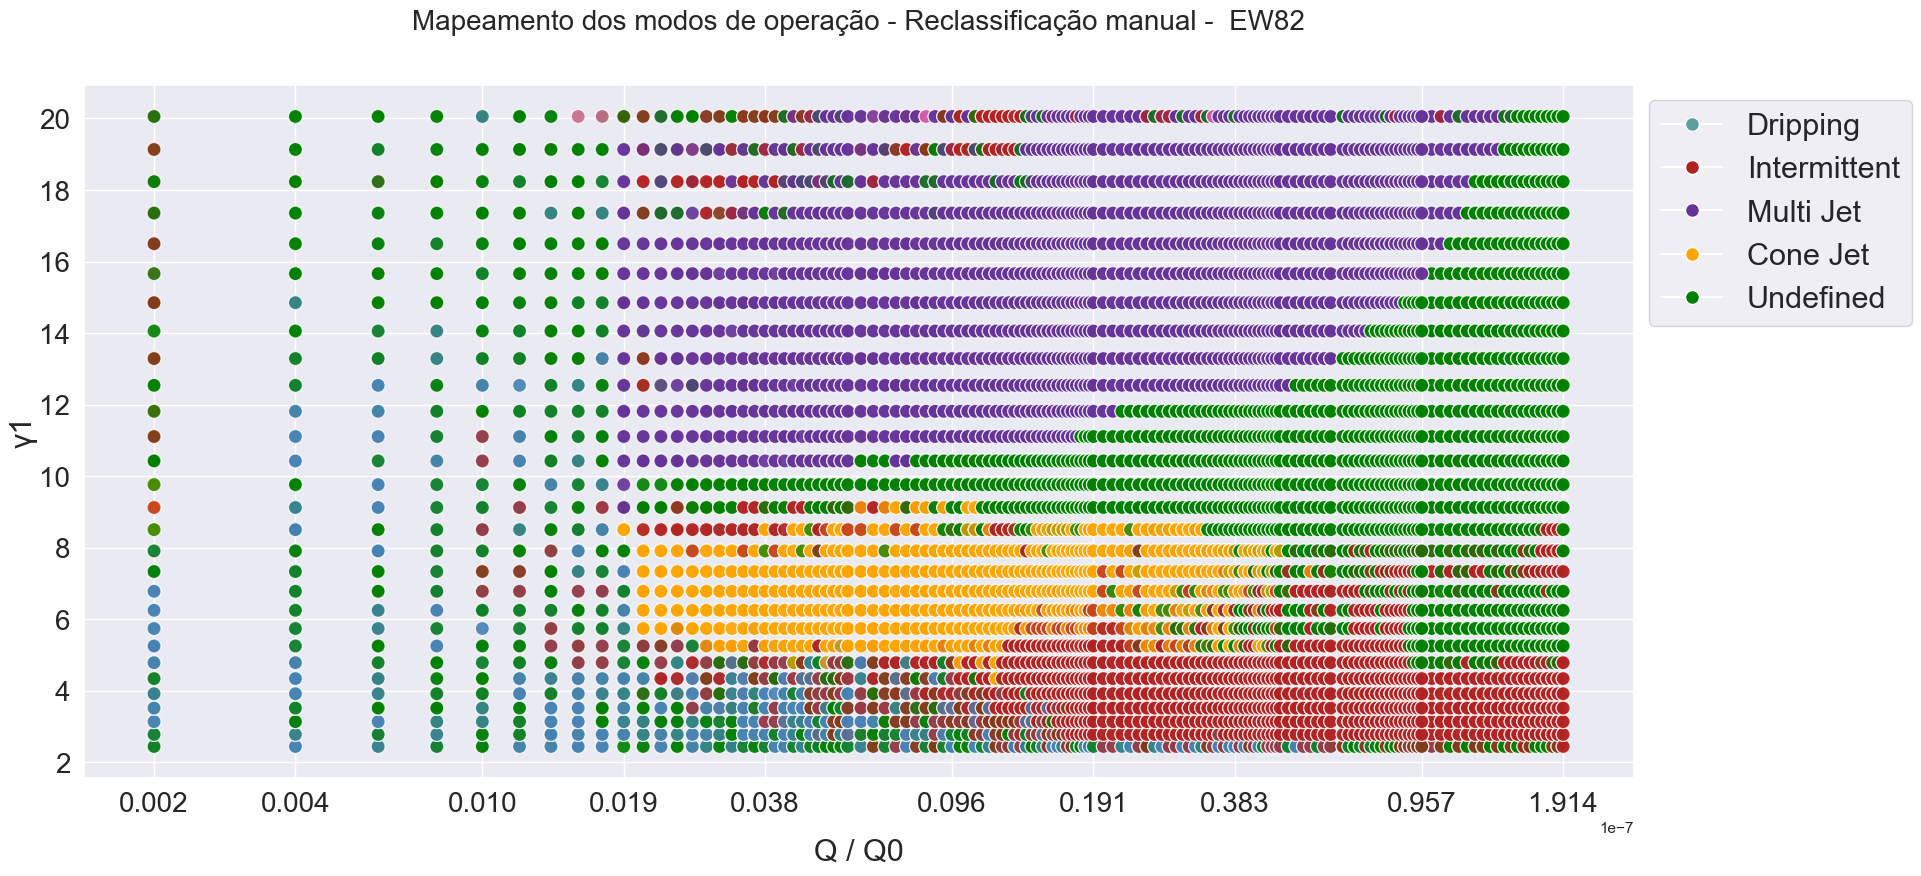

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

inverse_voltage = df['voltage']

# Define a palette com as cores
custom_palette = {'blue': 'steelblue', 'orange': 'orange', 'red': 'firebrick', 'green': 'green', 'purple': 'rebeccapurple', 'pink': 'hotpink'}

# Plotagem
fig, ax = plt.subplots(figsize=(20, 9))
fig.patch.set_facecolor('white')  # Define a cor de fundo da figura como branco

scatterplot = sns.scatterplot(data=df, x='Undimensional_flowrate', y='Undimensional_voltage', hue='colormap', palette=custom_palette, ax=ax, alpha=0.7, s=100)
ax.set_xscale("log")
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
Xtick = df.Undimensional_flowrate[0] #Defining the xticks
ax.set_xticks([Xtick,(Xtick*2),(Xtick*5),(Xtick*10),(Xtick*20),(Xtick*50),(Xtick*100),(Xtick*200),(Xtick*500),(Xtick*1000)])
ax.set_ylabel('γ1', fontsize=22, labelpad=1)
ax.set_xlabel('Q / Q0', fontsize=22,labelpad=15)

# Increase font size for ticks and tick labels on primary axes
ax.tick_params(axis='both', which='major', labelsize=20)

from matplotlib.lines import Line2D
# legend_elements = [Line2D([0], [0], marker='o', color='w', label='Gotejamento', markerfacecolor='cadetblue', markersize=10),
#                    Line2D([0], [0], marker='o', color='w', label='Intermitente', markerfacecolor='firebrick', markersize=10),
#                    Line2D([0], [0], marker='o', color='w', label='Multi-jato', markerfacecolor='rebeccapurple', markersize=10),
#                    Line2D([0], [0], marker='o', color='w', label='Jato-cônico', markerfacecolor='orange', markersize=10),
#                    Line2D([0], [0], marker='o', color='w', label='Indefinido', markerfacecolor='green', markersize=10)]

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Dripping', markerfacecolor='cadetblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Intermittent', markerfacecolor='firebrick', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Multi Jet', markerfacecolor='rebeccapurple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Cone Jet', markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Undefined', markerfacecolor='green', markersize=10)]

# plt.title("Mapeamento dos modos de operação - Reclassificação manual -  EW82", fontsize=20, pad=40)
plt.title("EHDA operation mode mapping - Manual reclassification", fontsize=20, pad=40)

legend = ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1), fontsize=22)  # Adjust font size here

plt.savefig("EW82_5")

plt.show()


In [42]:
ml_colormap = []
for electro_class in df['ml_spray_mode']:
    if electro_class == 'Intermittent':
        ml_colormap.append('red')
    elif electro_class == 'Cone Jet':
       ml_colormap.append('orange')
    elif electro_class == 'Dripping':
        ml_colormap.append('blue')
    elif electro_class == 'Multi Jet':
        ml_colormap.append('purple')
    elif electro_class == 'Undefined':
        ml_colormap.append('green')
    elif electro_class == 'Corona':
        ml_colormap.append('pink')    
    else:
        ml_colormap.append('orange')


df.insert(1, 'ml_colormap', ml_colormap)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13054 entries, 0 to 15839
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     13054 non-null  object        
 1   ml_colormap               13054 non-null  object        
 2   colormap                  13054 non-null  object        
 3   name                      13054 non-null  object        
 4   current                   13054 non-null  object        
 5   flow_rate                 13054 non-null  int64         
 6   voltage                   13054 non-null  float64       
 7   current_PS                13054 non-null  float64       
 8   temperature               13054 non-null  float64       
 9   humidity                  13054 non-null  float64       
 10  date_and_time             13054 non-null  datetime64[ns]
 11  target_voltage            13054 non-null  int64         
 12  mean                   

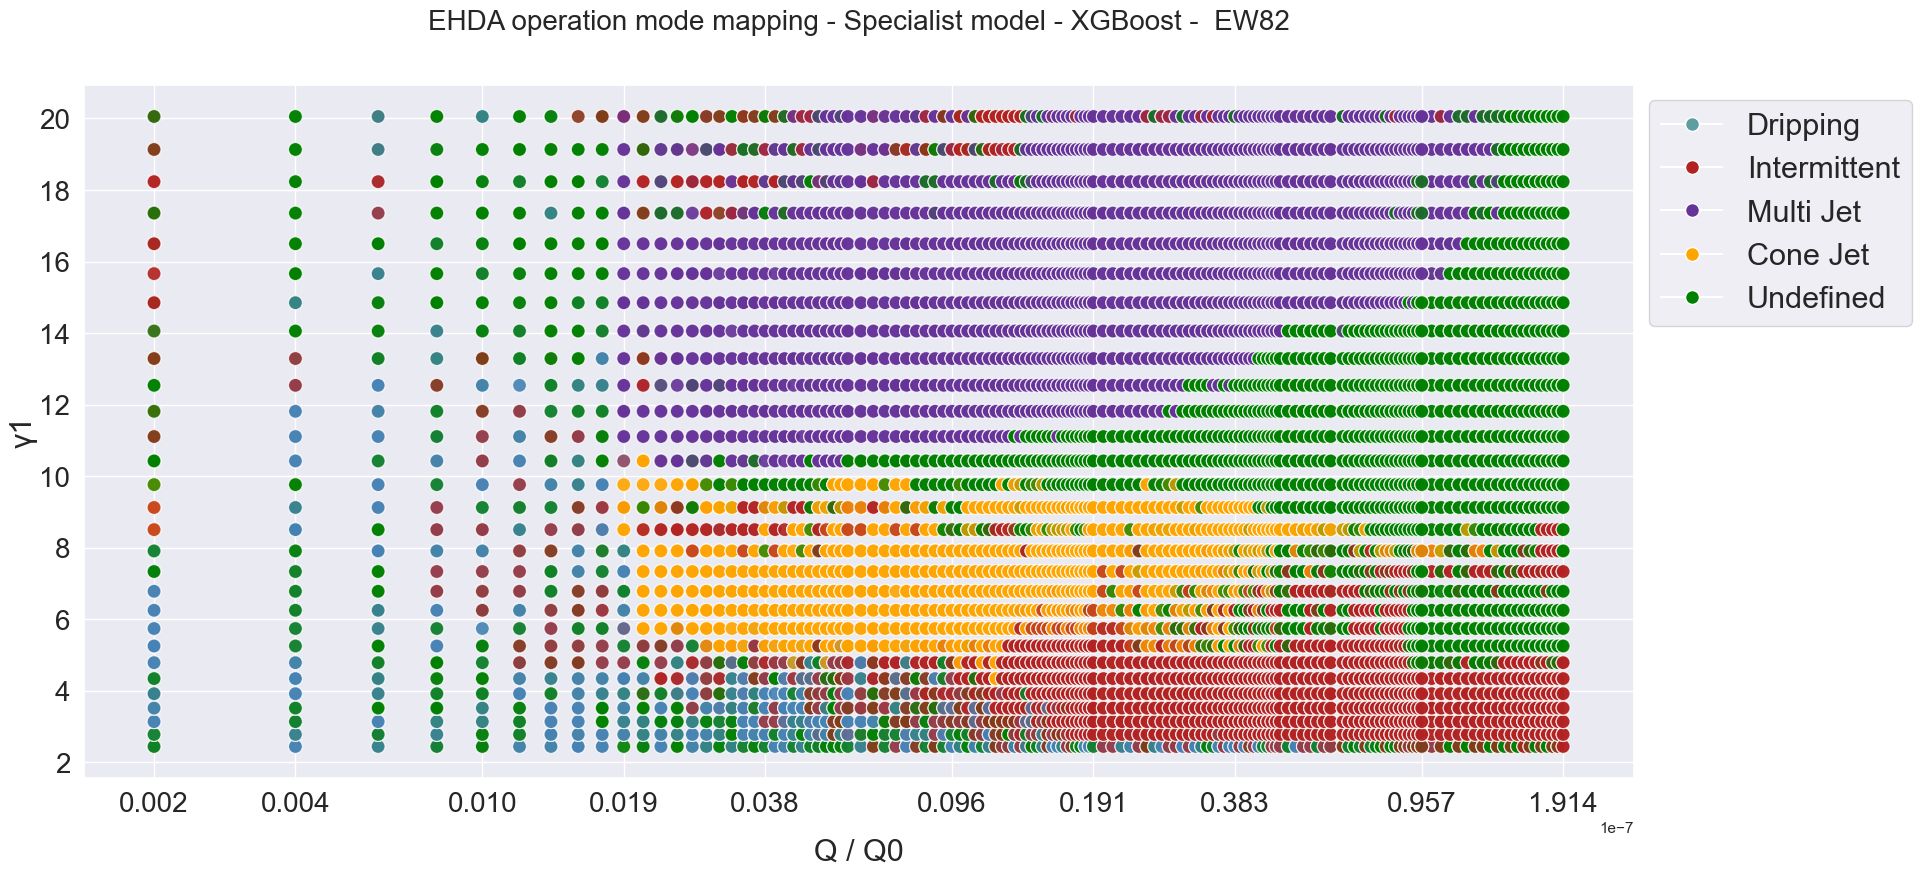

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

inverse_voltage = df['voltage']

# Define a palette com as cores
custom_palette = {'blue': 'steelblue', 'orange': 'orange', 'red': 'firebrick', 'green': 'green', 'purple': 'rebeccapurple', 'pink': 'hotpink'}

# Plotagem
fig, ax = plt.subplots(figsize=(20, 9))
fig.patch.set_facecolor('white')  # Define a cor de fundo da figura como branco

scatterplot = sns.scatterplot(data=df, x='Undimensional_flowrate', y='Undimensional_voltage', hue='ml_colormap', palette=custom_palette, ax=ax, alpha=0.7, s=100)
ax.set_xscale("log")
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
Xtick = df.Undimensional_flowrate[0] #Defining the xticks
ax.set_xticks([Xtick,(Xtick*2),(Xtick*5),(Xtick*10),(Xtick*20),(Xtick*50),(Xtick*100),(Xtick*200),(Xtick*500),(Xtick*1000)])
ax.set_ylabel('γ1', fontsize=22, labelpad=1)
ax.set_xlabel('Q / Q0', fontsize=22,labelpad=15)

# Increase font size for ticks and tick labels on primary axes
ax.tick_params(axis='both', which='major', labelsize=20)

from matplotlib.lines import Line2D
# legend_elements = [Line2D([0], [0], marker='o', color='w', label='Gotejamento', markerfacecolor='cadetblue', markersize=10),
#                    Line2D([0], [0], marker='o', color='w', label='Intermitente', markerfacecolor='firebrick', markersize=10),
#                    Line2D([0], [0], marker='o', color='w', label='Multi-jato', markerfacecolor='rebeccapurple', markersize=10),
#                    Line2D([0], [0], marker='o', color='w', label='Jato cônico', markerfacecolor='orange', markersize=10),
#                    Line2D([0], [0], marker='o', color='w', label='Indefinido', markerfacecolor='green', markersize=10)]

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Dripping', markerfacecolor='cadetblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Intermittent', markerfacecolor='firebrick', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Multi Jet', markerfacecolor='rebeccapurple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Cone Jet', markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Undefined', markerfacecolor='green', markersize=10)]

# plt.title("Mapeamento dos modos de operação - Modelo especialista - XGBoost -  EW82", fontsize=20, pad=40)
plt.title("EHDA operation mode mapping - Specialist model - XGBoost -  EW82", fontsize=20, pad=40)
legend = ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1), fontsize=22)  # Adjust font size here

plt.savefig("EW82_5_specialist")

plt.show()


In [44]:
gen_ml_colormap = []
for electro_class in df['generalist_ml_spray_mode']:
    if electro_class == 'Intermittent':
        gen_ml_colormap.append('red')
    elif electro_class == 'Cone Jet':
       gen_ml_colormap.append('orange')
    elif electro_class == 'Dripping':
        gen_ml_colormap.append('blue')
    elif electro_class == 'Multi Jet':
        gen_ml_colormap.append('purple')
    elif electro_class == 'Undefined':
        gen_ml_colormap.append('green')
    elif electro_class == 'Corona':
        gen_ml_colormap.append('pink')    
    else:
        gen_ml_colormap.append('orange')


df.insert(1, 'gen_ml_colormap', gen_ml_colormap)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13054 entries, 0 to 15839
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     13054 non-null  object        
 1   gen_ml_colormap           13054 non-null  object        
 2   ml_colormap               13054 non-null  object        
 3   colormap                  13054 non-null  object        
 4   name                      13054 non-null  object        
 5   current                   13054 non-null  object        
 6   flow_rate                 13054 non-null  int64         
 7   voltage                   13054 non-null  float64       
 8   current_PS                13054 non-null  float64       
 9   temperature               13054 non-null  float64       
 10  humidity                  13054 non-null  float64       
 11  date_and_time             13054 non-null  datetime64[ns]
 12  target_voltage         

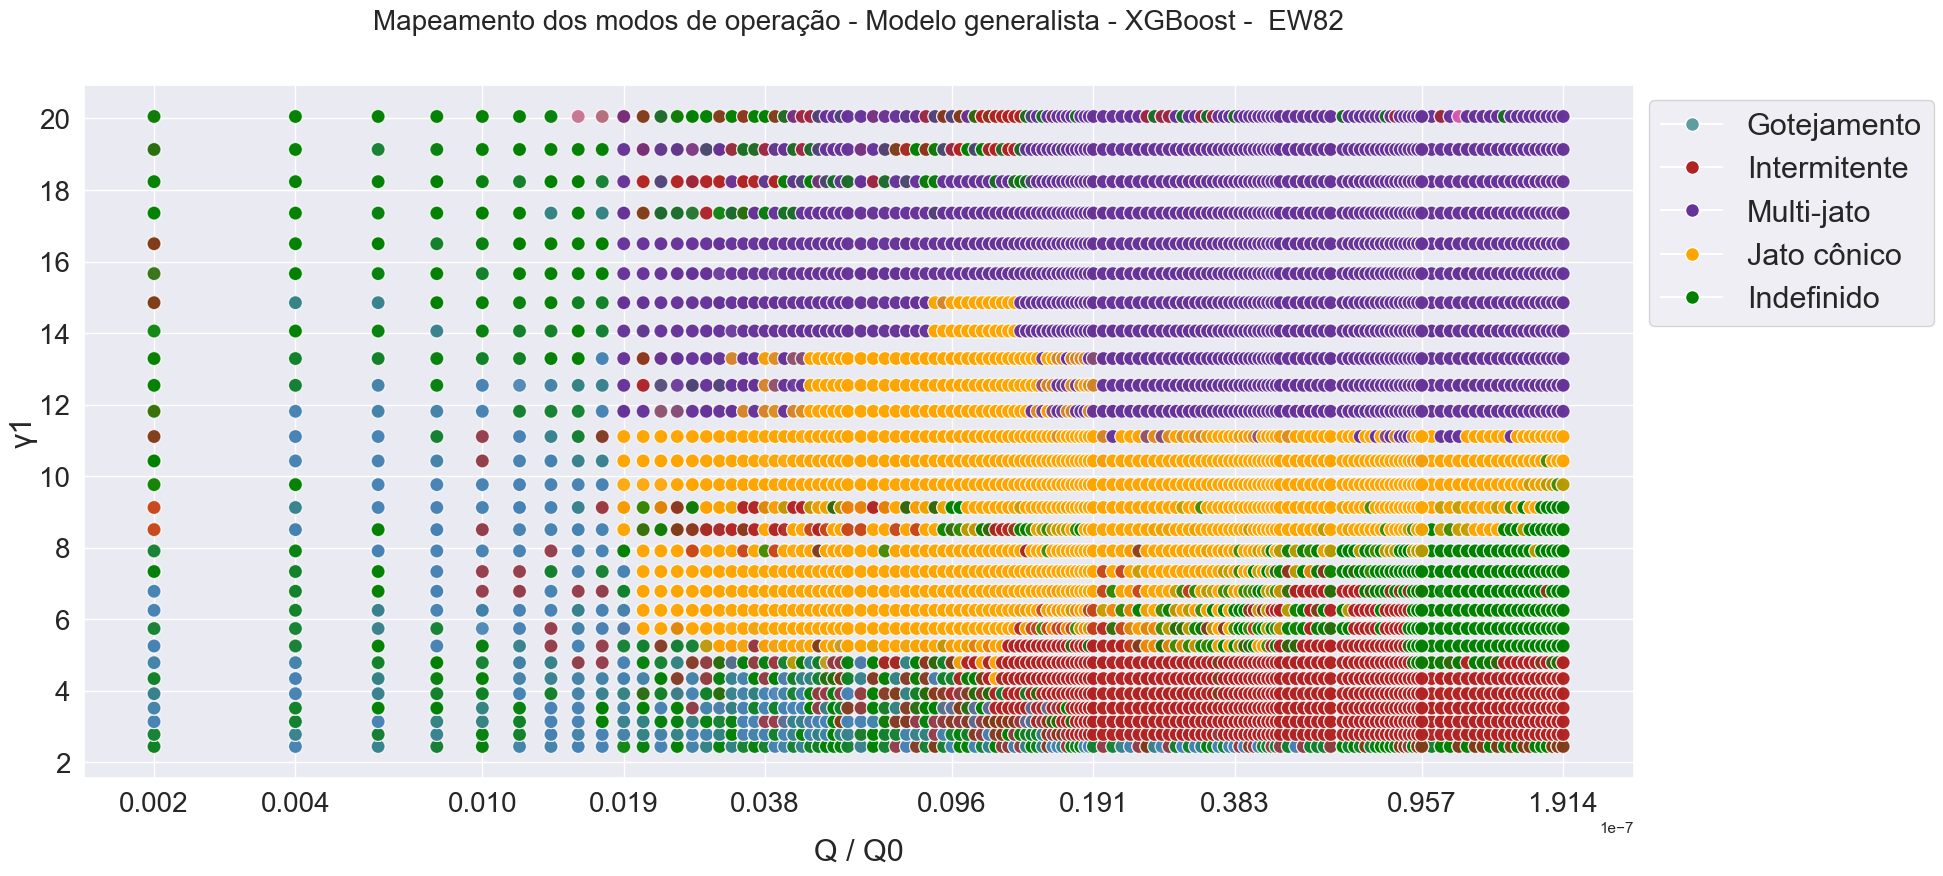

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

inverse_voltage = df['voltage']

# Define a palette com as cores
custom_palette = {'blue': 'steelblue', 'orange': 'orange', 'red': 'firebrick', 'green': 'green', 'purple': 'rebeccapurple', 'pink': 'hotpink'}

# Plotagem
fig, ax = plt.subplots(figsize=(20, 9))
fig.patch.set_facecolor('white')  # Define a cor de fundo da figura como branco

scatterplot = sns.scatterplot(data=df, x='Undimensional_flowrate', y='Undimensional_voltage', hue='gen_ml_colormap', palette=custom_palette, ax=ax, alpha=0.7, s=100)
ax.set_xscale("log")
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
Xtick = df.Undimensional_flowrate[0] #Defining the xticks
ax.set_xticks([Xtick,(Xtick*2),(Xtick*5),(Xtick*10),(Xtick*20),(Xtick*50),(Xtick*100),(Xtick*200),(Xtick*500),(Xtick*1000)])
ax.set_ylabel('γ1', fontsize=22, labelpad=1)
ax.set_xlabel('Q / Q0', fontsize=22,labelpad=15)

# Increase font size for ticks and tick labels on primary axes
ax.tick_params(axis='both', which='major', labelsize=20)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Gotejamento', markerfacecolor='cadetblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Intermitente', markerfacecolor='firebrick', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Multi-jato', markerfacecolor='rebeccapurple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Jato cônico', markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Indefinido', markerfacecolor='green', markersize=10)]

plt.title("Mapeamento dos modos de operação - Modelo generalista - XGBoost -  EW82", fontsize=20, pad=40)
legend = ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1), fontsize=22)  # Adjust font size here

plt.savefig("EW82_5_generalist")

plt.show()


In [46]:
nn_colormap = []
for electro_class in df['nn_spray_mode']:
    if electro_class == 'Intermittent':
        nn_colormap.append('red')
    elif electro_class == 'Cone Jet':
       nn_colormap.append('orange')
    elif electro_class == 'Dripping':
        nn_colormap.append('blue')
    elif electro_class == 'Multi Jet':
        nn_colormap.append('purple')
    elif electro_class == 'Undefined':
        nn_colormap.append('green')
    elif electro_class == 'Corona':
        nn_colormap.append('pink')    
    else:
        nn_colormap.append('orange')


df.insert(1, 'nn_colormap', nn_colormap)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13054 entries, 0 to 15839
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     13054 non-null  object        
 1   nn_colormap               13054 non-null  object        
 2   gen_ml_colormap           13054 non-null  object        
 3   ml_colormap               13054 non-null  object        
 4   colormap                  13054 non-null  object        
 5   name                      13054 non-null  object        
 6   current                   13054 non-null  object        
 7   flow_rate                 13054 non-null  int64         
 8   voltage                   13054 non-null  float64       
 9   current_PS                13054 non-null  float64       
 10  temperature               13054 non-null  float64       
 11  humidity                  13054 non-null  float64       
 12  date_and_time          

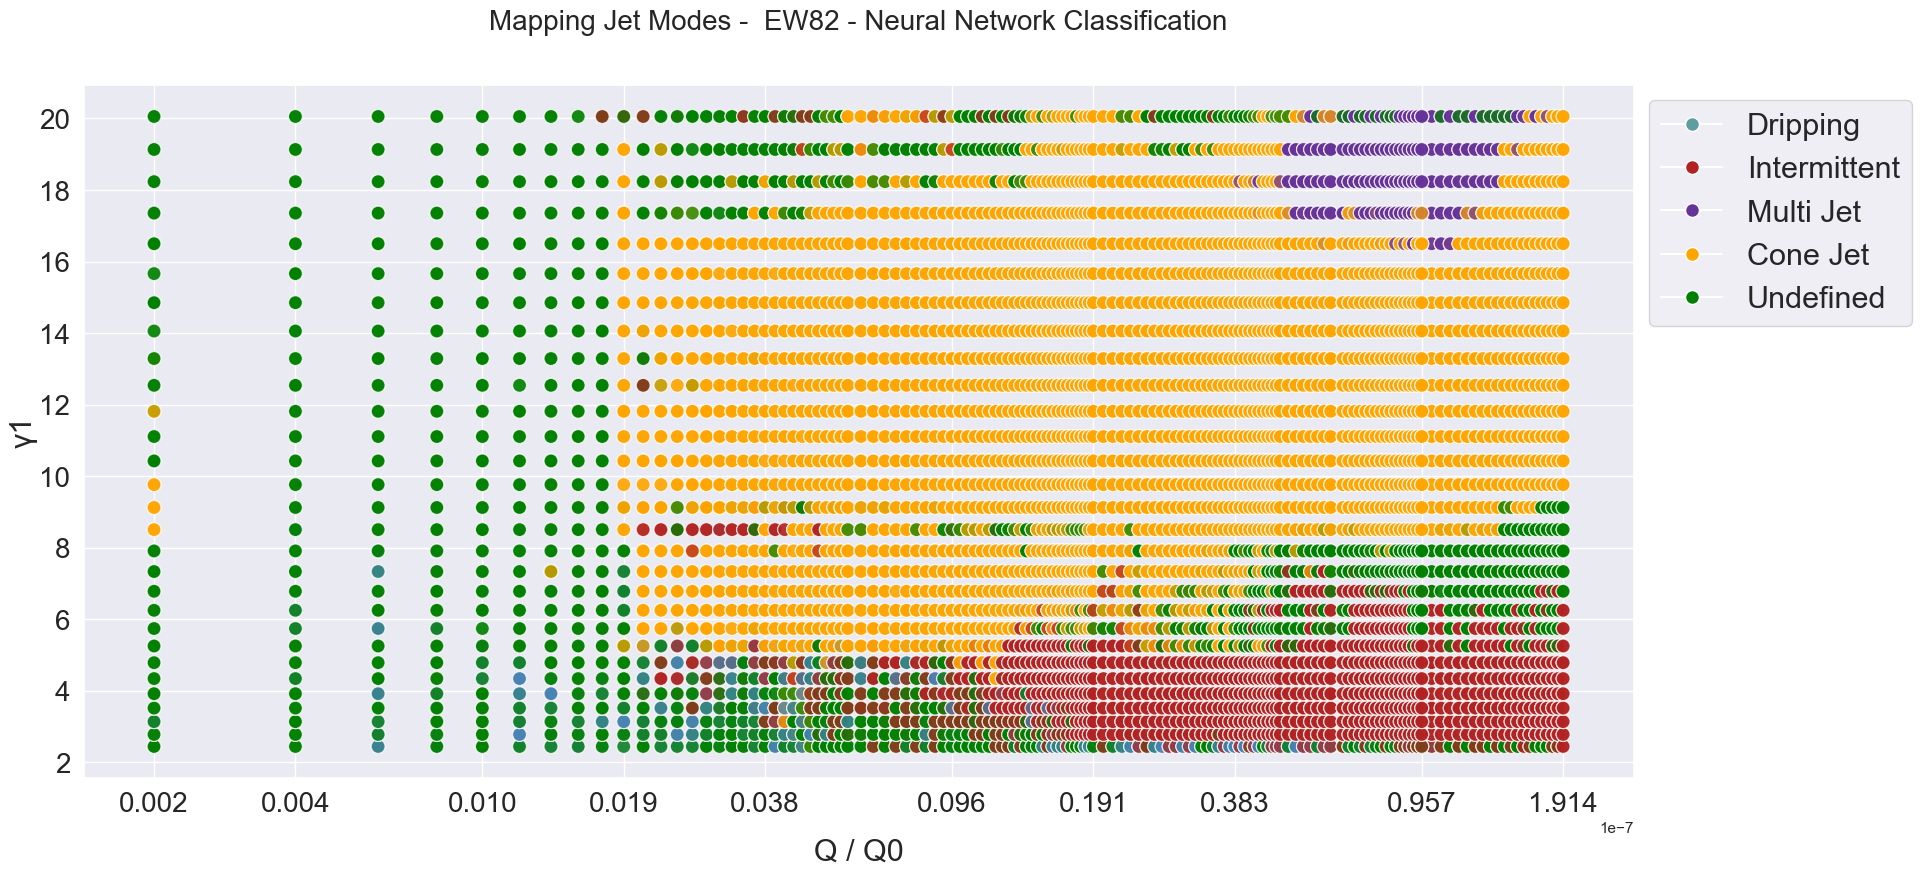

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

inverse_voltage = df['voltage']

# Define a palette com as cores
custom_palette = {'blue': 'steelblue', 'orange': 'orange', 'red': 'firebrick', 'green': 'green', 'purple': 'rebeccapurple', 'pink': 'hotpink'}

# Plotagem
fig, ax = plt.subplots(figsize=(20, 9))
fig.patch.set_facecolor('white')  # Define a cor de fundo da figura como branco

scatterplot = sns.scatterplot(data=df, x='Undimensional_flowrate', y='Undimensional_voltage', hue='nn_colormap', palette=custom_palette, ax=ax, alpha=0.7, s=100)
ax.set_xscale("log")
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
Xtick = df.Undimensional_flowrate[0] #Defining the xticks
ax.set_xticks([Xtick,(Xtick*2),(Xtick*5),(Xtick*10),(Xtick*20),(Xtick*50),(Xtick*100),(Xtick*200),(Xtick*500),(Xtick*1000)])
ax.set_ylabel('γ1', fontsize=22, labelpad=1)
ax.set_xlabel('Q / Q0', fontsize=22,labelpad=15)

# Increase font size for ticks and tick labels on primary axes
ax.tick_params(axis='both', which='major', labelsize=20)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Dripping', markerfacecolor='cadetblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Intermittent', markerfacecolor='firebrick', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Multi Jet', markerfacecolor='rebeccapurple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Cone Jet', markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Undefined', markerfacecolor='green', markersize=10)]

plt.title("Mapping Jet Modes -  EW82 - Neural Network Classification", fontsize=20, pad=40)
legend = ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1), fontsize=22)  # Adjust font size here

plt.savefig("EW82_5_nn")


plt.show()


In [48]:
intermittent_system_classification = df.loc[df["spray_mode"] == "Intermittent"]
intermittent_generalist_classification = df.loc[df["generalist_ml_spray_mode"] == "Intermittent"]
intermittent_specialist_classification = df.loc[df["ml_spray_mode"] == "Intermittent"]
intermittent_nn_classification = df.loc[df["nn_spray_mode"] == "Intermittent"]


In [49]:
print(len(intermittent_generalist_classification)/len(intermittent_system_classification))
print(len(intermittent_specialist_classification)/len(intermittent_system_classification))
print(len(intermittent_nn_classification)/len(intermittent_system_classification))

0.8658201784488675
1.0202470830473576
0.8891557995881949


In [50]:
dripping_system_classification = df.loc[df["spray_mode"] == "Dripping"]
dripping_generalist_classification = df.loc[df["generalist_ml_spray_mode"] == "Dripping"]
dripping_specialist_classification = df.loc[df["ml_spray_mode"] == "Dripping"]
dripping_nn_classification = df.loc[df["nn_spray_mode"] == "Dripping"]

In [51]:
print(len(dripping_generalist_classification)/len(dripping_system_classification))
print(len(dripping_specialist_classification)/len(dripping_system_classification))
print(len(dripping_nn_classification)/len(dripping_system_classification))

1.1320093457943925
1.0408878504672898
0.39369158878504673


In [52]:
undefined_system_classification = df.loc[df["spray_mode"] == "Undefined"]
undefined_generalist_classification = df.loc[df["generalist_ml_spray_mode"] == "Undefined"]
undefined_specialist_classification = df.loc[df["ml_spray_mode"] == "Undefined"]
undefined_nn_classification = df.loc[df["nn_spray_mode"] == "Undefined"]

In [53]:
print(len(undefined_generalist_classification)/len(undefined_system_classification))
print(len(undefined_specialist_classification)/len(undefined_system_classification))
print(len(undefined_nn_classification)/len(undefined_system_classification))

0.49354308523127494
0.9417703686311341
0.6501526179854425


In [54]:
conejet_system_classification = df.loc[df["spray_mode"] == "Cone Jet"]
conejet_generalist_classification = df.loc[df["generalist_ml_spray_mode"] == "Cone Jet"]
conejet_specialist_classification = df.loc[df["ml_spray_mode"] == "Cone Jet"]
conejet_nn_classification = df.loc[df["nn_spray_mode"] == "Cone Jet"]

In [55]:
print(len(conejet_generalist_classification)/len(conejet_system_classification))
print(len(conejet_specialist_classification)/len(conejet_system_classification))
print(len(conejet_nn_classification)/len(conejet_system_classification))

2.520497803806735
1.2379209370424598
5.06515373352855


In [56]:
multijet_system_classification = df.loc[df["spray_mode"] == "Multi Jet"]
multijet_generalist_classification = df.loc[df["generalist_ml_spray_mode"] == "Multi Jet"]
multijet_specialist_classification = df.loc[df["ml_spray_mode"] == "Multi Jet"]
multijet_nn_classification = df.loc[df["nn_spray_mode"] == "Multi Jet"]

In [57]:
print(len(multijet_generalist_classification)/len(multijet_system_classification))
print(len(multijet_specialist_classification)/len(multijet_system_classification))
print(len(multijet_nn_classification)/len(multijet_system_classification))

1.0991237677984667
0.9550930996714129
0.11610076670317634


In [58]:
import itertools
from sklearn.metrics import confusion_matrix

label_names = ['Cone Jet', 'Dripping', 'Intermittent', 'Multi Jet', 'Undefined']
y_true = df["spray_mode"]

def plot_normalized_confusion_matrix(y_true, y_pred, classes, title, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm_normalized.max() / 2.
    for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
        plt.text(j, i, format(cm_normalized[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe predita')
    plt.tight_layout()  

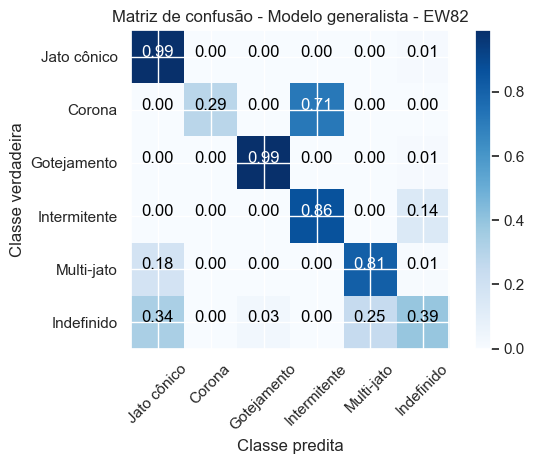

In [59]:
y_pred = df["generalist_ml_spray_mode"]
label_names = ['Jato cônico', 'Corona', 'Gotejamento', 'Intermitente', 'Multi-jato', 'Indefinido']
plot_normalized_confusion_matrix(y_true, y_pred, label_names, 'Matriz de confusão - Modelo generalista - EW82')
plt.show()

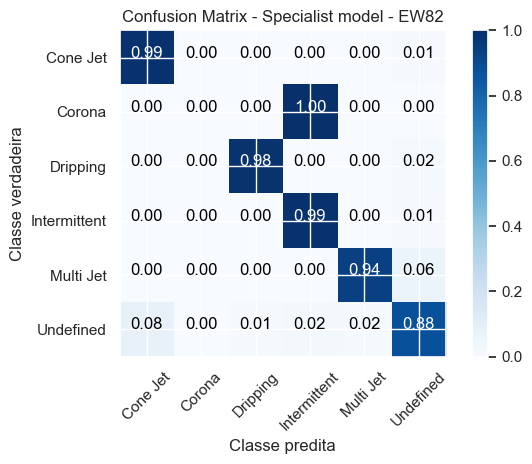

In [60]:
y_pred = df["ml_spray_mode"]
# label_names = ['Jato cônico', 'Corona', 'Gotejamento', 'Intermitente', 'Multi-jato', 'Indefinido']
label_names = ['Cone Jet', 'Corona', 'Dripping', 'Intermittent', 'Multi Jet', 'Undefined']

# plot_normalized_confusion_matrix(y_true, y_pred, label_names, 'Matriz de confusão - Modelo especialista - EW82')
plot_normalized_confusion_matrix(y_true, y_pred, label_names, 'Confusion Matrix - Specialist model - EW82')

plt.show()

In [61]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_pred, y_true)
f1_score = f1_score(y_pred, y_true, average='weighted')
print("Accuracy: ", accuracy)
print("F1_Score(weighted): ", f1_score)

Accuracy:  0.9377968438792708
F1_Score(weighted):  0.9377023702623623


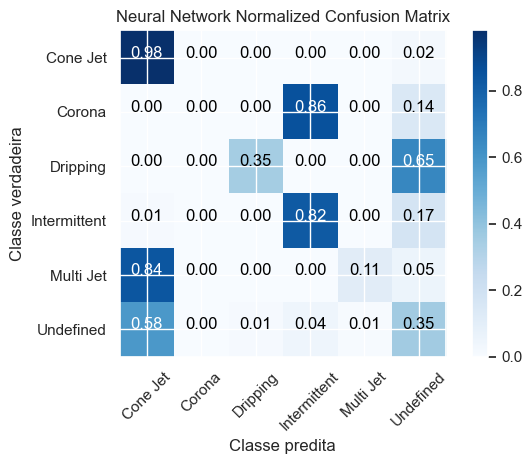

In [62]:
#Preciso encontrar os índices onde o nn_spray_mode foi None e remover as linhas tanto do y_pred quanto do y_true

y_true = df["spray_mode"]
y_pred = df["nn_spray_mode"]

indices_with_none = y_pred[y_pred.isnull()].index.tolist()

y_true = y_true.drop(indices_with_none)
y_pred = y_pred.drop(indices_with_none)

plot_normalized_confusion_matrix(y_true, y_pred, label_names, 'Neural Network Normalized Confusion Matrix')
plt.show()